In [1]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Expts/SOURCE/Data/'
path2analysis = '/Users/' + uname + '/Work/Expts/SOURCE/Analysis/'

In [2]:
%cd {path2code}

import misc, os, re, SelfRep
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')
import glob
%matplotlib inline

# R
%load_ext rpy2.ipython

%R library(lme4)
%R library(lmerTest)
%R library(lsmeans)
%R lsm.options(disable.pbkrtest=TRUE)
%R library(mutoss)
%R library(ez)
%R library(sjPlot)
%R library(sjmisc)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Matrix

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lmerTest’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lme4’:

    lmer


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:stats’:

    step


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/fu

/Users/ebarrick/Work/Expts/Code


/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lmerTest’:

    lsmeans


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: mvtnorm

  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['sjmisc', 'sjPlot', 'ez', 'mutoss', 'mvtnorm', 'lsmeans',
       'estimability', 'lmerTest', 'lme4', 'Matrix', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S12')

In [3]:
# Check on original format of file
%cd {path2data}

subjects = !ls -d SM011

for subject in subjects:
    arts1 = pd.read_csv (path2data + subject + "/Analysis/ERPs_-200_to_2000/" + subject + "_artifacts.txt", 
                         delim_whitespace=True)
arts1

/Users/ebarrick/Work/Expts/SOURCE/Data


,Bin,#(%),accepted,#(%).1,rejected,#,F2,#.1,F3,#.2,F4,#.3,F5,#.4,F6,#.5,F7,#.6,F8
0,1,12(,92.3),1(,7.7),0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0(error),0(error),0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0(error),0(error),0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6(,85.7),1(,14.3),0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0(error),0(error),0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,3(,75.0),1(,25.0),0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1(100.0),0(,0.0),0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,7(100.0),0(,0.0),0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,7(,87.5),1(,12.5),0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0(error),0(error),0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Healthy controls

In [4]:
#Import bin artifact files. This is to see how many trials were accepted/rejected for each bin. Clean up data.
%cd {path2data}

subjects = ['SM011','SM013','SM014','SM017','SM018','SM019','SM021','SM022','SM023','SM024','SM028','SM032','SM035',
            'SM036','SM040', 'SM041','SM042','SM043','SM044','SM045','SM056','SM058','SM070','SM072']
dfs = []

for subject in subjects:
    filenames = glob.glob(path2data + subject + "/Analysis/ERPs_-200_to_2000/" + subject + "_artifacts.txt")
    for filename in filenames:
        df = pd.read_csv(filename, delim_whitespace=True)
        df['subject'] = subject
        dfs.append(df)   

arts1 = pd.concat(dfs, ignore_index=True)
arts1["Accepted"] = arts1["#(%)"] + arts1["accepted"]
arts1["Rejected"] = arts1["#(%).1"] + arts1["rejected"]

arts2= arts1[['subject','Bin','Accepted','Rejected']].copy()
arts3= (arts2.loc[arts2['Bin'].isin(['118','119','111','112','104','105','97','98'])])
arts3 = arts3.replace({'Bin' : { '118' : 'Q MI_hit', '119' : 'Q MI_miss', '111' : 'Q LNL_hit', '112' : "Q LNL_miss",
                                '104': 'S MI_hit','105' : 'S MI_miss', '97' : 'S LNL_hit', '98' : 'S LNL_miss'}})

arts3['accepted'], arts3['accepted_percent'] = zip(*arts3['Accepted'].apply(lambda x: x.split('(', 1)))
arts3['cue'], arts3['Task'] = zip(*arts3['Bin'].apply(lambda x: x.split(' ', 1)))
arts3 = arts3.replace({'cue' : {'S' : 'Side', 'Q' : 'Question'}})
arts3['task'], arts3['accuracy'] = zip(*arts3['Task'].apply(lambda x: x.split('_', 1)))

arts4 = arts3[['subject','cue','task','accuracy','accepted']].copy()

arts4['group'] = 'HC'
arts4

/Users/ebarrick/Work/Expts/SOURCE/Data


,subject,cue,task,accuracy,accepted,group
96,SM011,Side,LNL,hit,13,HC
97,SM011,Side,LNL,miss,20,HC
103,SM011,Side,MI,hit,16,HC
104,SM011,Side,MI,miss,20,HC
110,SM011,Question,LNL,hit,27,HC
111,SM011,Question,LNL,miss,10,HC
117,SM011,Question,MI,hit,12,HC
118,SM011,Question,MI,miss,26,HC
261,SM013,Side,LNL,hit,19,HC
262,SM013,Side,LNL,miss,7,HC


# Depressed

In [5]:
#Import bin artifact files. This is to see how many trials were accepted/rejected for each bin. Clean up data.
%cd {path2data}

subjects = ['SM015','SM026','SM031','SM037','SM038','SM039','SM046','SM047','SM048','SM049','SM050','SM051','SM055',
            'SM059','SM060','SM062','SM063','SM064','SM066','SM067','SM069','SM071','SM073','SM074']
dfs = []

for subject in subjects:
    filenames = glob.glob(path2data + subject + "/Analysis/ERPs_-200_to_2000/" + subject + "_artifacts.txt")
    for filename in filenames:
        df = pd.read_csv(filename, delim_whitespace=True)
        df['subject'] = subject
        dfs.append(df)

arts1 = pd.concat(dfs, ignore_index=True)
arts1["Accepted"] = arts1["#(%)"] + arts1["accepted"]
arts1["Rejected"] = arts1["#(%).1"] + arts1["rejected"]

arts2= arts1[['subject','Bin','Accepted','Rejected']].copy()
arts3= (arts2.loc[arts2['Bin'].isin(['118','119','111','112','104','105','97','98'])])
arts3 = arts3.replace({'Bin' : { '118' : 'Q MI_hit', '119' : 'Q MI_miss', '111' : 'Q LNL_hit', '112' : "Q LNL_miss",
                                '104': 'S MI_hit','105' : 'S MI_miss', '97' : 'S LNL_hit', '98' : 'S LNL_miss'}})

arts3['accepted'], arts3['accepted_percent'] = zip(*arts3['Accepted'].apply(lambda x: x.split('(', 1)))
arts3['cue'], arts3['Task'] = zip(*arts3['Bin'].apply(lambda x: x.split(' ', 1)))
arts3 = arts3.replace({'cue' : {'S' : 'Side', 'Q' : 'Question'}})
arts3['task'], arts3['accuracy'] = zip(*arts3['Task'].apply(lambda x: x.split('_', 1)))

arts5 = arts3[['subject','cue','task','accuracy','accepted']].copy()
arts5['group'] = 'MDD'
arts5

/Users/ebarrick/Work/Expts/SOURCE/Data


,subject,cue,task,accuracy,accepted,group
96,SM015,Side,LNL,hit,24,MDD
97,SM015,Side,LNL,miss,22,MDD
103,SM015,Side,MI,hit,23,MDD
104,SM015,Side,MI,miss,21,MDD
110,SM015,Question,LNL,hit,17,MDD
111,SM015,Question,LNL,miss,26,MDD
117,SM015,Question,MI,hit,34,MDD
118,SM015,Question,MI,miss,9,MDD
261,SM026,Side,LNL,hit,31,MDD
262,SM026,Side,LNL,miss,6,MDD


In [6]:
df = pd.concat([arts4,arts5])
df

,subject,cue,task,accuracy,accepted,group
96,SM011,Side,LNL,hit,13,HC
97,SM011,Side,LNL,miss,20,HC
103,SM011,Side,MI,hit,16,HC
104,SM011,Side,MI,miss,20,HC
110,SM011,Question,LNL,hit,27,HC
111,SM011,Question,LNL,miss,10,HC
117,SM011,Question,MI,hit,12,HC
118,SM011,Question,MI,miss,26,HC
261,SM013,Side,LNL,hit,19,HC
262,SM013,Side,LNL,miss,7,HC


In [7]:
df.accepted = df.accepted.astype(int)

In [8]:
g = df.groupby(['group','subject','cue','task','accuracy'])['accepted'].mean()
newdf = g.to_frame()
newdf.reset_index(inplace = True)
newdf.head()
newdf.groupby(['group','cue','task','accuracy'])['accepted'].mean()

group  cue       task  accuracy
HC     Question  LNL   hit         22.541667
                       miss        10.750000
                 MI    hit         24.875000
                       miss         7.291667
       Side      LNL   hit         23.500000
                       miss         6.458333
                 MI    hit         25.208333
                       miss         6.125000
MDD    Question  LNL   hit         21.166667
                       miss        12.000000
                 MI    hit         28.375000
                       miss         6.458333
       Side      LNL   hit         23.166667
                       miss         8.500000
                 MI    hit         24.916667
                       miss         7.083333
Name: accepted, dtype: float64

In [9]:
newdf.groupby(['group','cue','task','accuracy'])['accepted'].min()

group  cue       task  accuracy
HC     Question  LNL   hit          9
                       miss         2
                 MI    hit         10
                       miss         1
       Side      LNL   hit         12
                       miss         0
                 MI    hit         11
                       miss         1
MDD    Question  LNL   hit         10
                       miss         2
                 MI    hit         17
                       miss         1
       Side      LNL   hit         12
                       miss         0
                 MI    hit         15
                       miss         0
Name: accepted, dtype: int64

In [10]:
newdf.groupby(['group','cue','task','accuracy'])['accepted'].max()

group  cue       task  accuracy
HC     Question  LNL   hit         33
                       miss        18
                 MI    hit         39
                       miss        26
       Side      LNL   hit         43
                       miss        20
                 MI    hit         45
                       miss        20
MDD    Question  LNL   hit         37
                       miss        26
                 MI    hit         39
                       miss        13
       Side      LNL   hit         36
                       miss        22
                 MI    hit         37
                       miss        21
Name: accepted, dtype: int64

In [11]:
%Rpush df
%R library(ez)
# %R str(df)
%R df$accepted <- as.numeric(df$accepted)
%R hits = subset(df, accuracy == 'hit')
%R misses = subset(df, accuracy == 'miss')
%R accuracy.hit <- ezANOVA(dv = accepted, wid = subject, between = group, within = c(cue,task), data = hits)
%R print(accuracy.hit)

$ANOVA
          Effect DFn DFd            F            p p<.05          ges
2          group   1  46  0.047864500 8.277896e-01       7.936119e-04
3            cue   1  46  0.004589559 9.462812e-01       9.805364e-06
5           task   1  46 35.853569484 3.020452e-07     * 5.629789e-02
4      group:cue   1  46  1.249507371 2.694507e-01       2.662429e-03
6     group:task   1  46  5.128462992 2.829335e-02     * 8.461002e-03
7       cue:task   1  46  9.710969378 3.152691e-03     * 1.289487e-02
8 group:cue:task   1  46  6.130174702 1.703114e-02     * 8.178945e-03



In [12]:
df.head()

,subject,cue,task,accuracy,accepted,group
96,SM011,Side,LNL,hit,13,HC
97,SM011,Side,LNL,miss,20,HC
103,SM011,Side,MI,hit,16,HC
104,SM011,Side,MI,miss,20,HC
110,SM011,Question,LNL,hit,27,HC


In [13]:
df.accepted = df.accepted.astype(int)

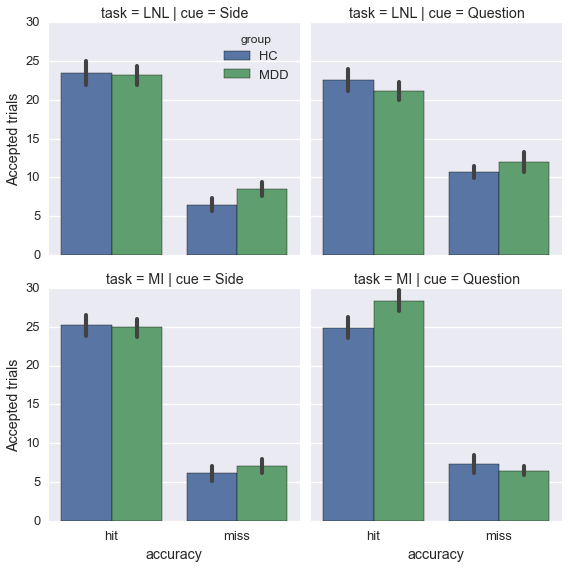

In [14]:
g = sns.factorplot(y = 'accepted', x = 'accuracy', col = 'cue', row = 'task', hue = 'group', 
               units = 'subject', kind = 'bar', ci = 68, data = df, legend_out=False);
g.set_ylabels('Accepted trials')
sns.plt.tight_layout()